In [17]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

In [2]:
# Load Data From CSV File
df = pd.read_csv('../excel/users.csv')
cols_id = list(df.columns)

df.head()

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
0,karthiga,2255153,3,49,1,0,0,55.31,Female,"Chennai, India",1990-04-29,NaN,2013-03-03,2014-02-04 01:32:00,7.43,0.0,3391.0
1,RedvelvetDaisuki,1897606,61,396,39,0,206,118.07,Female,Manila,1995-01-01,NaN,2012-12-13,1900-05-13 02:47:00,6.78,80.0,7094.0
2,Damonashu,37326,45,195,27,25,59,83.70,Male,"Detroit,Michigan",1991-08-01,NaN,2008-02-13,1900-03-24 12:48:00,6.15,6.0,4936.0
3,bskai,228342,25,414,2,5,11,167.16,Male,"Nayarit, Mexico",1990-12-14,NaN,2009-08-31,2014-05-12 16:35:00,8.27,1.0,10081.0
4,terune_uzumaki,327311,5,5,0,0,0,15.20,Female,"Malaysia, Kuantan",1998-08-24,NaN,2010-05-10,2012-10-18 19:06:00,9.70,6.0,920.0


In [3]:
def random_email():
    begin = ''.join(random.choice(string.ascii_lowercase) for x in range(8))
    return begin + "@gmail.com"
def random_password():
    return ''.join(random.choice(string.ascii_letters) for x in range(8))

In [4]:
# Generating random emails and passwords for user login
import random
import string

emails = []
passwords = []

def email_unique():
    email = random_email()
    if email not in emails:
        return email
    else:
        email_unique()
    
for user in range(len(df)):
    email = email_unique()
    password = random_password()
    emails.append(email)
    passwords.append(password)

print(emails[0:5])

KeyboardInterrupt: 

In [5]:
df['email'] = emails
df['password'] = passwords
df.head()

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes,email,password
0,karthiga,2255153,3,49,1,0,0,55.31,Female,"Chennai, India",1990-04-29,NaN,2013-03-03,2014-02-04 01:32:00,7.43,0.0,3391.0,fzqxkake@gmail.com,EUXmWAAT
1,RedvelvetDaisuki,1897606,61,396,39,0,206,118.07,Female,Manila,1995-01-01,NaN,2012-12-13,1900-05-13 02:47:00,6.78,80.0,7094.0,dslqvwup@gmail.com,XFZhJhDl
2,Damonashu,37326,45,195,27,25,59,83.70,Male,"Detroit,Michigan",1991-08-01,NaN,2008-02-13,1900-03-24 12:48:00,6.15,6.0,4936.0,jabkxxbd@gmail.com,opeWuyfa
3,bskai,228342,25,414,2,5,11,167.16,Male,"Nayarit, Mexico",1990-12-14,NaN,2009-08-31,2014-05-12 16:35:00,8.27,1.0,10081.0,owphdkhn@gmail.com,ZnMRTdZL
4,terune_uzumaki,327311,5,5,0,0,0,15.20,Female,"Malaysia, Kuantan",1998-08-24,NaN,2010-05-10,2012-10-18 19:06:00,9.70,6.0,920.0,elaiggqf@gmail.com,iCYSIqFO


In [6]:
df.rename(columns={'user_id': 'id'}, inplace=True)
df.drop(['user_onhold', 'access_rank', 'last_online'], axis=1, inplace=True)
df.head()

,username,id,user_watching,user_completed,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,join_date,stats_mean_score,stats_rewatched,stats_episodes,email,password
0,karthiga,2255153,3,49,0,0,55.31,Female,"Chennai, India",1990-04-29,2013-03-03,7.43,0.0,3391.0,fzqxkake@gmail.com,EUXmWAAT
1,RedvelvetDaisuki,1897606,61,396,0,206,118.07,Female,Manila,1995-01-01,2012-12-13,6.78,80.0,7094.0,dslqvwup@gmail.com,XFZhJhDl
2,Damonashu,37326,45,195,25,59,83.70,Male,"Detroit,Michigan",1991-08-01,2008-02-13,6.15,6.0,4936.0,jabkxxbd@gmail.com,opeWuyfa
3,bskai,228342,25,414,5,11,167.16,Male,"Nayarit, Mexico",1990-12-14,2009-08-31,8.27,1.0,10081.0,owphdkhn@gmail.com,ZnMRTdZL
4,terune_uzumaki,327311,5,5,0,0,15.20,Female,"Malaysia, Kuantan",1998-08-24,2010-05-10,9.70,6.0,920.0,elaiggqf@gmail.com,iCYSIqFO


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116133 entries, 0 to 116132
Data columns (total 16 columns):
username                    116132 non-null object
id                          116133 non-null int64
user_watching               116133 non-null int64
user_completed              116133 non-null int64
user_dropped                116133 non-null int64
user_plantowatch            116133 non-null int64
user_days_spent_watching    116133 non-null float64
gender                      116133 non-null object
location                    116127 non-null object
birth_date                  116133 non-null object
join_date                   116133 non-null object
stats_mean_score            116133 non-null float64
stats_rewatched             116133 non-null float64
stats_episodes              116133 non-null float64
email                       116133 non-null object
password                    116133 non-null object
dtypes: float64(4), int64(5), object(7)
memory usage: 14.2+ MB


In [30]:
df["id"] += 1
df.head()

,username,id,user_watching,user_completed,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,join_date,stats_mean_score,stats_rewatched,stats_episodes,email,password
0,karthiga,2255154,3,49,0,0,55.31,Female,"Chennai, India",1990-04-29,2013-03-03,7.43,0.0,3391.0,fzqxkake@gmail.com,EUXmWAAT
1,RedvelvetDaisuki,1897607,61,396,0,206,118.07,Female,Manila,1995-01-01,2012-12-13,6.78,80.0,7094.0,dslqvwup@gmail.com,XFZhJhDl
2,Damonashu,37327,45,195,25,59,83.70,Male,"Detroit,Michigan",1991-08-01,2008-02-13,6.15,6.0,4936.0,jabkxxbd@gmail.com,opeWuyfa
3,bskai,228343,25,414,5,11,167.16,Male,"Nayarit, Mexico",1990-12-14,2009-08-31,8.27,1.0,10081.0,owphdkhn@gmail.com,ZnMRTdZL
4,terune_uzumaki,327312,5,5,0,0,15.20,Female,"Malaysia, Kuantan",1998-08-24,2010-05-10,9.70,6.0,920.0,elaiggqf@gmail.com,iCYSIqFO


In [32]:
# df.to_csv('../excel/users_process.csv', header = None, index=False)

In [12]:
cols = ["username", "user_id", "user_watching", "user_completed", "user_dropped", "user_plantowatch", "user_days_spent_watching", "gender", "location", "birth_date", "join_date", "stats_mean_score", "stats_rewatched", "stats_episodes", "email", "password"]
df_process = pd.read_csv('../excel/users_process.csv', names=cols)
df_process.head(50)

,username,user_id,user_watching,user_completed,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,join_date,stats_mean_score,stats_rewatched,stats_episodes,email,password
0,karthiga,2255154,3,49,0,0,55.31,Female,"Chennai, India",1990-04-29,2013-03-03,7.43,0.0,3391.0,fzqxkake@gmail.com,EUXmWAAT
1,RedvelvetDaisuki,1897607,61,396,0,206,118.07,Female,Manila,1995-01-01,2012-12-13,6.78,80.0,7094.0,dslqvwup@gmail.com,XFZhJhDl
2,Damonashu,37327,45,195,25,59,83.70,Male,"Detroit,Michigan",1991-08-01,2008-02-13,6.15,6.0,4936.0,jabkxxbd@gmail.com,opeWuyfa
3,bskai,228343,25,414,5,11,167.16,Male,"Nayarit, Mexico",1990-12-14,2009-08-31,8.27,1.0,10081.0,owphdkhn@gmail.com,ZnMRTdZL
4,terune_uzumaki,327312,5,5,0,0,15.20,Female,"Malaysia, Kuantan",1998-08-24,2010-05-10,9.70,6.0,920.0,elaiggqf@gmail.com,iCYSIqFO
5,Bas_G,5015095,35,114,20,175,30.81,Male,"Nijmegen, Nederland",1999-10-24,2015-11-26,7.86,0.0,1847.0,lgokoodq@gmail.com,riUYiSWh
6,HimeAria,3129316,2,87,0,28,20.12,Female,Poland,1996-09-26,2013-09-08,8.23,0.0,1314.0,vxwqbjej@gmail.com,SlAJxuCm
7,Skallington,326734,0,3,0,0,4.32,Male,Norberg Sweden,1991-03-15,2010-05-09,10.00,7.0,251.0,irmucdft@gmail.com,tmzOLMSZ
8,Slimak,61678,79,224,3,84,126.17,Male,Poland,1988-02-21,2008-05-18,7.77,2.0,7472.0,qgwhllgg@gmail.com,oGecguHU
9,Elysiun,5927343,7,4,0,4,2.09,Male,Nebraska,1984-11-16,2016-12-25,7.40,0.0,121.0,jreazslf@gmail.com,tGcePECU


In [14]:
df_model = df_process.drop(['username', 'user_id', 'gender', 'location', 'birth_date', 'join_date', 'email', 'password'], axis=1)
df_model.head()

,user_watching,user_completed,user_dropped,user_plantowatch,user_days_spent_watching,stats_mean_score,stats_rewatched,stats_episodes
0,3,49,0,0,55.31,7.43,0.0,3391.0
1,61,396,0,206,118.07,6.78,80.0,7094.0
2,45,195,25,59,83.70,6.15,6.0,4936.0
3,25,414,5,11,167.16,8.27,1.0,10081.0
4,5,5,0,0,15.20,9.70,6.0,920.0


In [49]:
df_model.describe()

,user_watching,user_completed,user_dropped,user_plantowatch,user_days_spent_watching,stats_mean_score,stats_rewatched,stats_episodes
count,116133.000000,116133.000000,116133.000000,116133.000000,1.161330e+05,116133.000000,116133.000000,1.161330e+05
mean,14.610283,195.498807,11.818518,74.936332,9.329691e+01,7.713389,13.991079,6.611762e+03
std,32.459424,256.533148,31.117077,177.889249,7.636053e+03,1.538595,54.731186,7.155270e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,3.000000,47.000000,0.000000,5.000000,2.246000e+01,7.310000,0.000000,1.349000e+03
50%,7.000000,121.000000,3.000000,27.000000,4.990000e+01,7.880000,1.000000,3.017000e+03
75%,16.000000,253.000000,12.000000,80.000000,9.277000e+01,8.460000,10.000000,5.642000e+03
max,2934.000000,11536.000000,2457.000000,12051.000000,2.601351e+06,10.000000,9404.000000,2.437949e+08


In [15]:
#Normalizing over the standard deviation
#Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method 
#that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. 
#We use tandardScaler() to normalize our dataset.
from sklearn.preprocessing import StandardScaler
X = df_model.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-5.71074107e-01, -3.79809757e-01, -4.21254542e-01, ...,
        -1.84187595e-01, -2.55633771e-01, -4.50126377e-03],
       [ 7.81583424e-01, -3.79809757e-01,  7.36774330e-01, ...,
        -6.06652794e-01,  1.20606203e+00,  6.73964956e-04],
       [-1.94442533e-03,  4.23611077e-01, -8.95860783e-02, ...,
        -1.01611906e+00, -1.46006586e-01, -2.34200685e-03],
       ...,
       [-3.60574088e-01, -1.22715090e-01, -1.17693575e-01, ...,
        -2.03685989e-01, -2.37362573e-01, -5.17908875e-03],
       [ 1.69574109e-01, -2.51262423e-01,  5.68129349e-01, ...,
         8.23229418e-01,  6.03112510e-01, -1.81512021e-03],
       [-4.77518543e-01, -3.15536090e-01, -3.31310552e-01, ...,
         7.64734237e-01, -5.46505986e-02,  6.11073977e-04]])

In [31]:
#Modeling
#In our example (if we didn't have access to the k-means algorithm), it would be the same as guessing that each customer group 
#would have certain age, income, education, etc, with multiple tests and experiments. However, using the K-means clustering 
#we can do all this process much easier. Lets apply k-means on our dataset, and take look at cluster labels.
clusterNum = 10
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 25)
k_means.fit(X)
labels = k_means.labels_
print(labels[0:550])

[4 0 0 0 4 4 4 4 0 4 4 6 4 0 0 4 0 4 4 0 0 4 4 4 0 4 4 9 0 9 4 0 0 4 0 4 4
 4 9 4 4 0 4 0 0 4 4 0 0 4 4 4 0 4 4 0 9 0 4 0 4 4 0 0 9 4 4 0 0 4 0 4 4 4
 0 4 0 9 0 4 0 4 4 4 0 0 4 4 0 4 0 4 4 4 9 0 9 0 4 0 0 0 4 0 4 0 4 0 4 4 0
 4 0 0 0 4 4 4 4 4 4 4 4 4 0 0 4 0 4 4 0 4 4 0 4 0 4 4 4 0 4 4 4 4 4 0 4 0
 4 0 4 0 4 0 4 4 0 4 9 0 4 4 4 4 0 0 0 0 4 4 0 4 4 4 4 4 0 4 4 4 0 4 9 4 0
 0 4 4 4 4 4 0 9 4 4 0 4 4 4 4 4 4 4 4 4 0 4 4 0 4 4 4 4 4 4 4 0 4 0 0 4 4
 0 9 9 0 4 0 4 0 4 0 4 9 4 4 4 0 4 4 0 4 4 4 4 0 4 4 0 4 4 4 0 4 4 4 4 4 0
 4 9 4 0 4 4 0 9 4 4 0 0 4 0 4 4 9 0 4 4 4 4 4 4 4 4 9 0 0 0 4 4 4 0 0 9 0
 4 0 0 0 4 0 4 0 0 0 4 0 4 4 0 4 0 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 0 4 0
 4 4 4 0 0 4 4 4 0 4 4 4 4 9 4 4 9 4 4 9 4 4 0 4 0 0 4 4 0 4 0 4 4 0 4 4 4
 0 0 0 0 4 0 4 4 9 0 4 4 9 4 4 0 4 0 0 0 4 4 0 4 0 4 4 4 0 4 4 0 4 9 4 0 4
 0 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 0 9 4 0 4 4 0 4 4 4 4 4 0 4 4 0 4 4 0 9 0
 4 0 4 4 4 9 4 4 4 4 4 4 0 9 4 4 4 4 4 0 4 4 4 4 4 4 4 4 0 9 0 9 0 4 4 0 0
 4 4 4 4 9 4 0 0 4 9 4 4 

In [32]:
#Labels-We assign labels to each row of data frame
df["Clus_User"] = labels
df.head(5)

,username,id,user_watching,user_completed,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,join_date,stats_mean_score,stats_rewatched,stats_episodes,Clus_User
0,karthiga,2255153,3,49,0,0,55.31,Female,"Chennai, India",1990-04-29,2013-03-03,7.43,0.0,3391.0,4
1,RedvelvetDaisuki,1897606,61,396,0,206,118.07,Female,Manila,1995-01-01,2012-12-13,6.78,80.0,7094.0,0
2,Damonashu,37326,45,195,25,59,83.70,Male,"Detroit,Michigan",1991-08-01,2008-02-13,6.15,6.0,4936.0,0
3,bskai,228342,25,414,5,11,167.16,Male,"Nayarit, Mexico",1990-12-14,2009-08-31,8.27,1.0,10081.0,0
4,terune_uzumaki,327311,5,5,0,0,15.20,Female,"Malaysia, Kuantan",1998-08-24,2010-05-10,9.70,6.0,920.0,4


In [33]:
#Centroid values-We can easily check the centroid values by averaging the features in each cluster.
df.groupby('Clus_User').mean()

,id,user_watching,user_completed,user_dropped,user_plantowatch,user_days_spent_watching,stats_mean_score,stats_rewatched,stats_episodes
Clus_User,,,,,,,,,
0,1.792333e+06,21.458288,326.708318,20.268382,110.121207,1.144850e+02,7.526641,20.053976,6.937102e+03
1,4.432320e+05,35.000000,2034.000000,1.000000,7.000000,2.601351e+06,1.010000,0.000000,2.437949e+08
2,2.365580e+06,17.000000,103.500000,0.000000,144.500000,1.554713e+04,5.350000,0.000000,1.968107e+06
3,2.098282e+06,69.800000,519.400000,6.400000,63.000000,1.072659e+04,8.460000,141.800000,9.052774e+05
4,1.850133e+06,9.999751,86.599225,6.217983,51.723194,3.239444e+01,7.825444,6.167867,1.939613e+03
5,2.045285e+06,22.529412,205.882353,4.705882,41.529412,2.237776e+03,7.923529,246.411765,2.951389e+05
6,1.491477e+06,27.475309,1007.746914,26.194444,200.225309,4.747698e+02,7.682870,172.108025,5.837969e+04
7,1.484400e+06,38.666667,220.000000,13.333333,81.000000,1.553848e+04,4.086667,8.000000,1.421763e+06
8,1.620992e+06,25.721311,682.459016,8.459016,94.311475,7.986377e+02,7.951803,321.180328,1.520815e+05


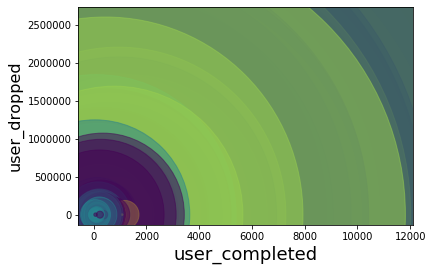

In [48]:
#Now, lets look at the distribution of customers based on their age and income:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('user_completed', fontsize=18)
plt.ylabel('user_dropped', fontsize=16)
plt.show()

In [ ]:
# Shows the findings of the clusters